In [51]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

## Theoretical

In [2]:
a = 5.64e-10
kalpha = 1.54e-10
kbeta = 1.39e-10

In [3]:
# Plane (111)
columns = ['theta_alpha', 'theta_beta', 'plane', 'hkl']
theoretical_111 = pd.DataFrame(columns=columns)
for index in [1, 2, 3, 4]:
        h = k = l = index
        theoretical_111 = theoretical_111._append(pd.Series({
            'theta_alpha': f'{np.degrees(np.arcsin(np.sqrt(h ** 2 + k ** 2 + l ** 2) * kalpha /( 2 * a))):.2f}',
            'theta_beta':  f'{np.degrees(np.arcsin(np.sqrt(h ** 2 + k ** 2 + l ** 2) * kbeta /( 2 * a))):.2f}',
            'plane': f'{h}{k}{l}',
            'hkl': h ** 2 + k ** 2 + l ** 2,
        }), ignore_index=True)

latex_111 = theoretical_111.to_latex(index=False, column_format='|c|c|c|c|')

for old, new in [
    ('theta_alpha', r'$\theta (K_\alpha)$'),
    ('theta_beta', r'$\theta (K_\beta)$'),
    ('hkl', r'$h^2 + k^2 + l^2$'),
    (r'\toprule', r'\hline'),
    (r'\midrule', r'\hline'),
    (r'\bottomrule', r'\hline')
]: 
    latex_111 = latex_111.replace(old, new)
print(latex_111)

\begin{tabular}{|c|c|c|c|}
\hline
$\theta (K_\alpha)$ & $\theta (K_\beta)$ & plane & $h^2 + k^2 + l^2$ \\
\hline
13.68 & 12.32 & 111 & 3 \\
28.23 & 25.27 & 222 & 12 \\
45.19 & 39.81 & 333 & 27 \\
71.06 & 58.62 & 444 & 48 \\
\hline
\end{tabular}


In [4]:
# Plane (110)
columns = ['theta_alpha', 'theta_beta', 'plane', 'hkl']
theoretical_110 = pd.DataFrame(columns=columns)
for index in [2, 4]:
    h = k = index
    l = 0
    theoretical_110 = theoretical_110._append(pd.Series({
        'theta_alpha': f'{np.degrees(np.arcsin(np.sqrt(h ** 2 + k ** 2 + l ** 2) * kalpha /( 2 * a))):.2f}',
        'theta_beta':  f'{np.degrees(np.arcsin(np.sqrt(h ** 2 + k ** 2 + l ** 2) * kbeta /( 2 * a))):.2f}',
        'plane': f'{h}{k}{l}',
        'hkl': h ** 2 + k ** 2 + l ** 2,
    }), ignore_index=True)

latex_110 = theoretical_110.to_latex(index=False, column_format='|c|c|c|c|')

for old, new in [
    ('theta_alpha', r'$\theta (K_\alpha)$'),
    ('theta_beta', r'$\theta (K_\beta)$'),
    ('hkl', r'$h^2 + k^2 + l^2$'),
    (r'\toprule', r'\hline'),
    (r'\midrule', r'\hline'),
    (r'\bottomrule', r'\hline')
]:
    latex_110 = latex_110.replace(old, new)
print(latex_110)

\begin{tabular}{|c|c|c|c|}
\hline
$\theta (K_\alpha)$ & $\theta (K_\beta)$ & plane & $h^2 + k^2 + l^2$ \\
\hline
22.72 & 20.40 & 220 & 8 \\
50.56 & 44.19 & 440 & 32 \\
\hline
\end{tabular}


In [5]:
# Plane (100)
columns = ['theta_alpha', 'theta_beta', 'plane', 'hkl']
theoretical_100 = pd.DataFrame(columns=columns)
for index in [2, 4, 6]:
    h = index
    k = l = 0
    theoretical_100 = theoretical_100._append(pd.Series({
        'theta_alpha': f'{np.degrees(np.arcsin(np.sqrt(h ** 2 + k ** 2 + l ** 2) * kalpha /( 2 * a))):.2f}',
        'theta_beta':  f'{np.degrees(np.arcsin(np.sqrt(h ** 2 + k ** 2 + l ** 2) * kbeta /( 2 * a))):.2f}',
        'plane': f'{h}{k}{l}',
        'hkl': h ** 2 + k ** 2 + l ** 2,
    }), ignore_index=True)

latex_100 = theoretical_100.to_latex(index=False, column_format='|c|c|c|c|')

for old, new in [
    ('theta_alpha', r'$\theta (K_\alpha)$'),
    ('theta_beta', r'$\theta (K_\beta)$'),
    ('hkl', r'$h^2 + k^2 + l^2$'),
    (r'\toprule', r'\hline'),
    (r'\midrule', r'\hline'),
    (r'\bottomrule', r'\hline')
]:
    latex_100 = latex_100.replace(old, new)
print(latex_100)

\begin{tabular}{|c|c|c|c|}
\hline
$\theta (K_\alpha)$ & $\theta (K_\beta)$ & plane & $h^2 + k^2 + l^2$ \\
\hline
15.85 & 14.27 & 200 & 4 \\
33.10 & 29.53 & 400 & 16 \\
55.00 & 47.68 & 600 & 36 \\
\hline
\end{tabular}


## Experimental

In [6]:
columns = ["theta", "intensity"]

In [7]:
nacl_sample_1 = pd.read_csv('data/NaCl_sample_1.tsv', sep='\t', skiprows=1, encoding='unicode_escape')
nacl_sample_2 = pd.read_csv('data/NaCl_sample_2.tsv', sep='\t', skiprows=1, encoding='unicode_escape')
nacl_sample_3 = pd.read_csv('data/NaCl_sample_3.tsv', sep='\t', skiprows=1, encoding='unicode_escape')
samples = [nacl_sample_1, nacl_sample_2, nacl_sample_3]

Text(0.5, 23.52222222222222, '$\\theta$ (degrees)')

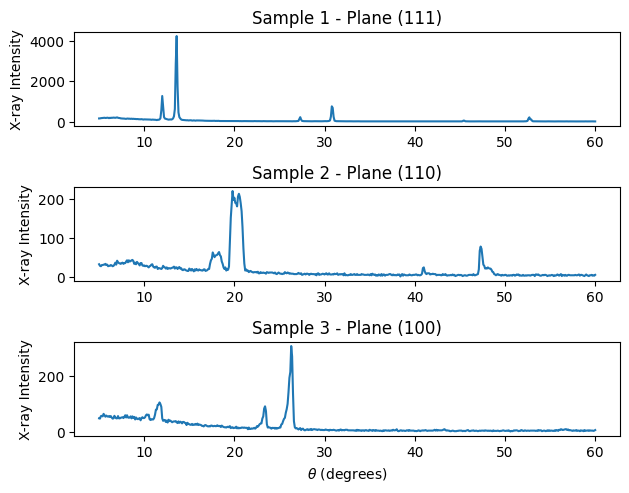

In [8]:
fig, axs = plt.subplots(nrows=len(samples))
titles = ["Plane (111)", "Plane (110)", "Plane (100)"]

for index, sample in enumerate(samples):
    sample.columns = columns
    axs[index].plot(
        sample["theta"],
        sample["intensity"]
    )
    axs[index].set_title(f'Sample {index + 1} - {titles[index]}')
    axs[index].set_ylabel('X-ray Intensity')

plt.tight_layout()
plt.xlabel(r'$\theta$ (degrees)')

In [9]:
def gauss(x, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def fit_gaussian(x, y, p0):
    popt, _ = curve_fit(gauss, x, y, p0)
    return (popt[1], abs(popt[2]))

In [10]:
def intensity_graph(df, plane):
    plt.plot(df['theta'], df['intensity'])
    plt.title(f'Plane [{plane}]')
    plt.xlabel(r'$\theta$ (degrees)')
    plt.ylabel(r'X-ray Intensity (Impl/s)')

### Sample 1

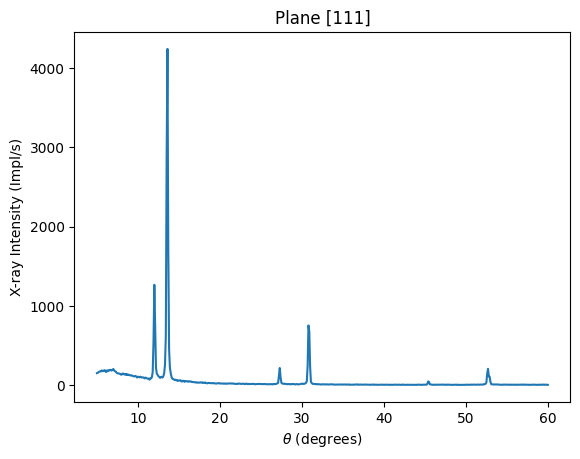

In [11]:
intensity_graph(nacl_sample_1, '111')

In [12]:
def extract_peak(data, l, r, show=False):
    data = data[(data.theta >= l) & (data.theta <= r)]
    if show: intensity_graph(data, 'Identifying Peaks')
    t, dt = fit_gaussian(data.theta, data.intensity, [1000, (l + r) / 2, 1])
    return t, dt

Text(0.5, 1.0, 'Sample 1 - Plane [111]')

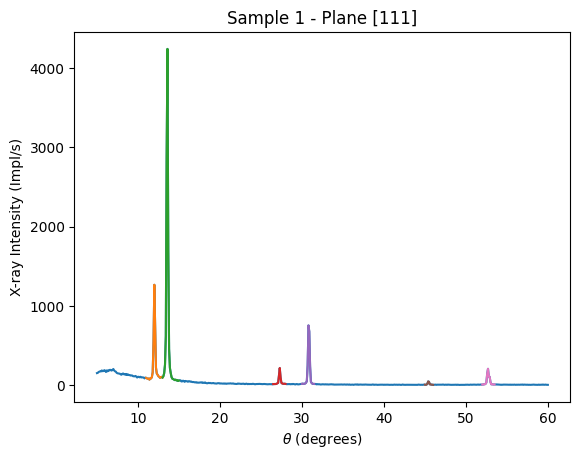

In [13]:
intensity_graph(nacl_sample_1, '111')
extract_peak(nacl_sample_1, 11, 13, True)
extract_peak(nacl_sample_1, 13, 15, True)
extract_peak(nacl_sample_1, 26.5, 28, True)
extract_peak(nacl_sample_1, 30, 31.5, True)
extract_peak(nacl_sample_1, 45, 46, True)
extract_peak(nacl_sample_1, 52, 53.5, True)
plt.title('Sample 1 - Plane [111]')

In [30]:
theta = []
dtheta = []
wavelength = []
expected_plane = [
    '111',
    '111',
    '222',
    '222',
    '333',
    '333'
]
for index, (l, r) in enumerate([(11, 13), (13, 15), (26.5, 28), (30, 31.5), (45, 46), (52, 53.5)]):
    m, dm = extract_peak(nacl_sample_1, l, r)
    theta.append(m)
    dtheta.append(dm)
    wavelength.append( kbeta if (index % 2 == 0) else kalpha)

In [31]:
s1 = pd.DataFrame({
    'theta': theta,
    'dtheta': dtheta,
    'wavelength': wavelength,
})
s1['expected_plane'] = expected_plane
s1['hkl2'] = (2 * a * np.sin(np.radians(s1.theta)) / s1.wavelength) ** 2
s1['dhkl2'] = 4 * a / s1.wavelength * np.radians(s1.dtheta) * np.cos(np.radians(s1.theta))

In [32]:
def compute_a_da(theta, dtheta, plane, wavelength):
    h, k, l = plane
    h = int(h)
    k = int(k)
    l = int(l)
    lattice_spacing = np.sqrt(h ** 2 + k ** 2 + l ** 2) * wavelength / (2 * np.sin(np.radians(theta)))
    d_lattice_spacing = np.radians(dtheta) * np.sqrt(h ** 2 + k ** 2 + l ** 2) * wavelength / 2 * np.cos(np.radians(theta)) / (np.sin(np.radians(theta))) ** 2
    return lattice_spacing, d_lattice_spacing

In [33]:
lattice_spacings = []
d_lattice_spacings = []
for t, dt, w, plane in zip(theta, dtheta, wavelength, expected_plane):
    ls, dls = compute_a_da(t, dt, plane, w)
    lattice_spacings.append(ls)
    d_lattice_spacings.append(dls)
    
s1['a'] = lattice_spacings
s1['da'] = d_lattice_spacings

In [34]:
latex_s1 = s1.copy()
latex_s1.wavelength = latex_s1.wavelength * 1e10
latex_s1.a = latex_s1.a * 1e10
latex_s1.da = latex_s1.da * 1e10

latex_s1.rename(
    columns={
        'theta': r'$\theta$ (degrees)',
        'dtheta': r'$\Delta \theta$ (degrees)',
        'wavelength': '$\lambda (\AA)$',
        'hkl2': '$h^2 + k^2 + l^2$',
        'dhkl2': '$\Delta(h^2 + k^2 + l^2)$',
        'expected_plane': 'Expected Plane',
        'a': r'$a (\AA)$',
        'da': r'$\Delta a (\AA)$',
    },
    inplace=True
) 

latex_s1 = latex_s1.to_latex(index=False, column_format='|c|c|c|c|c|c|c|c|', float_format='{:.2f}'.format)
for old, new in [
  
    (r'\toprule', r'\hline'),
    (r'\midrule', r'\hline'),
    (r'\bottomrule', r'\hline')
]:
    latex_s1 = latex_s1.replace(old, new)
    
print(latex_s1)

\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
$\theta$ (degrees) & $\Delta \theta$ (degrees) & $\lambda (\AA)$ & Expected Plane & $h^2 + k^2 + l^2$ & $\Delta(h^2 + k^2 + l^2)$ & $a (\AA)$ & $\Delta a (\AA)$ \\
\hline
12.01 & 0.10 & 1.39 & 111 & 2.85 & 0.03 & 5.78 & 0.05 \\
13.58 & 0.09 & 1.54 & 111 & 2.96 & 0.02 & 5.68 & 0.04 \\
27.29 & 0.09 & 1.39 & 222 & 13.85 & 0.02 & 5.25 & 0.02 \\
30.84 & 0.10 & 1.54 & 222 & 14.10 & 0.02 & 5.20 & 0.01 \\
45.44 & 0.10 & 1.39 & 333 & 33.43 & 0.02 & 5.07 & 0.01 \\
52.72 & 0.15 & 1.54 & 333 & 33.96 & 0.02 & 5.03 & 0.01 \\
\hline
\end{tabular}


## Sample 2

Text(0.5, 1.0, 'Sample 2 - Plane [110]')

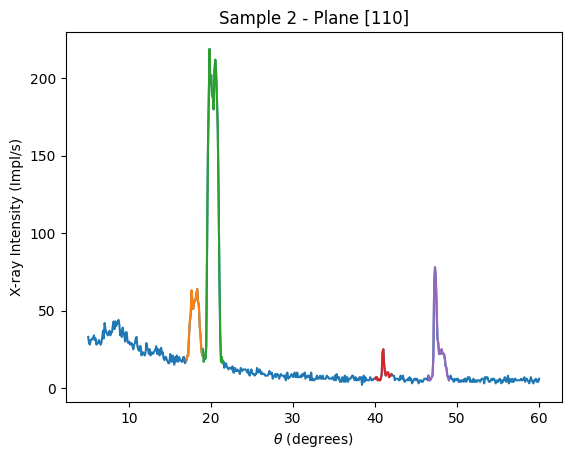

In [19]:
intensity_graph(nacl_sample_2, '110')
extract_peak(nacl_sample_2, 17, 19, True)
extract_peak(nacl_sample_2, 19, 21.5, True)
extract_peak(nacl_sample_2, 40, 42, True)
extract_peak(nacl_sample_2, 46.5, 49, True)
plt.title('Sample 2 - Plane [110]')

In [39]:
theta = []
dtheta = []
wavelength = []
expected_plane = [
    '220',
    '220',
    '440',
    '440',
]
for index, (l, r) in enumerate([(17, 19), (19, 21.5), (40, 42), (46.5, 49)]):
    m, dm = extract_peak(nacl_sample_2, l, r)
    theta.append(m + 2.5)
    dtheta.append(dm)
    wavelength.append( kbeta if (index % 2 == 0) else kalpha)

In [40]:
s2 = pd.DataFrame({
    'theta': theta,
    'dtheta': dtheta,
    'wavelength': wavelength,
})
s2['expected_plane'] = expected_plane
s2['hkl2'] = (2 * a * np.sin(np.radians(s2.theta)) / s2.wavelength) ** 2
s2['dhkl2'] = 4 * a / s2.wavelength * np.radians(s2.dtheta) * np.cos(np.radians(s2.theta))

In [41]:
lattice_spacings = []
d_lattice_spacings = []
for t, dt, w, plane in zip(theta, dtheta, wavelength, expected_plane):
    ls, dls = compute_a_da(t, dt, plane, w)
    lattice_spacings.append(ls)
    d_lattice_spacings.append(dls)
    
s2['a'] = lattice_spacings
s2['da'] = d_lattice_spacings

In [42]:
latex_s2 = s2.copy()
latex_s2.wavelength = latex_s2.wavelength * 1e10
latex_s2.a = latex_s2.a * 1e10
latex_s2.da = latex_s2.da * 1e10

latex_s2.rename(
    columns={
        'theta': r'$\theta$ (degrees)',
        'dtheta': r'$\Delta \theta$ (degrees)',
        'wavelength': '$\lambda (\AA)$',
        'hkl2': '$h^2 + k^2 + l^2$',
        'dhkl2': '$\Delta(h^2 + k^2 + l^2)$',
        'expected_plane': 'Expected Plane',
        'a': r'$a (\AA)$',
        'da': r'$\Delta a (\AA)$',
    },
    inplace=True
) 

latex_s2 = latex_s2.to_latex(index=False, column_format='|c|c|c|c|c|c|c|c|', float_format='{:.2f}'.format)
for old, new in [
  
    (r'\toprule', r'\hline'),
    (r'\midrule', r'\hline'),
    (r'\bottomrule', r'\hline')
]:
    latex_s2 = latex_s2.replace(old, new)
    
print(latex_s2)

\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
$\theta$ (degrees) & $\Delta \theta$ (degrees) & $\lambda (\AA)$ & Expected Plane & $h^2 + k^2 + l^2$ & $\Delta(h^2 + k^2 + l^2)$ & $a (\AA)$ & $\Delta a (\AA)$ \\
\hline
20.52 & 0.65 & 1.39 & 220 & 8.09 & 0.17 & 5.61 & 0.17 \\
22.73 & 0.55 & 1.54 & 220 & 8.01 & 0.13 & 5.64 & 0.13 \\
43.61 & 0.65 & 1.39 & 440 & 31.33 & 0.13 & 5.70 & 0.07 \\
49.88 & 0.23 & 1.54 & 440 & 31.37 & 0.04 & 5.70 & 0.02 \\
\hline
\end{tabular}


## Sample 3

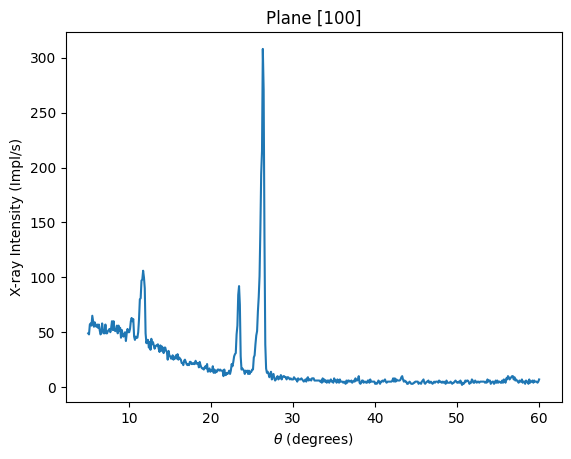

In [24]:
intensity_graph(nacl_sample_3, '100')

Text(0.5, 1.0, 'Sample 3 - Plane [100]')

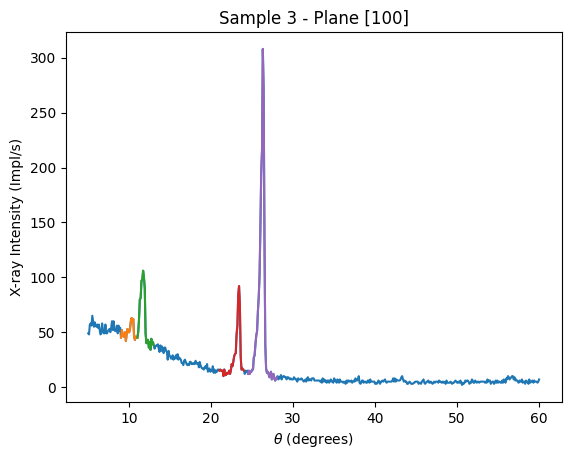

In [25]:
intensity_graph(nacl_sample_3, '100')
extract_peak(nacl_sample_3, 9, 11, True)
extract_peak(nacl_sample_3, 11, 13, True)
extract_peak(nacl_sample_3, 21, 24, True)
extract_peak(nacl_sample_3, 24.5, 28, True)
plt.title('Sample 3 - Plane [100]')

In [47]:
theta = []
dtheta = []
wavelength = []
expected_plane = [
    '200',
    '200',
    '400',
    '400',
]
for index, (l, r) in enumerate([(9, 11), (11, 13), (21, 24), (24.5, 28)]):
    m, dm = extract_peak(nacl_sample_3, l, r)
    theta.append(m + 4.2)
    dtheta.append(dm)
    wavelength.append( kbeta if (index % 2 == 0) else kalpha)

In [48]:
s3 = pd.DataFrame({
    'theta': theta,
    'dtheta': dtheta,
    'wavelength': wavelength,
})
s3['expected_plane'] = expected_plane
s3['hkl2'] = (2 * a * np.sin(np.radians(s3.theta)) / s3.wavelength) ** 2
s3['dhkl2'] = 4 * a / s3.wavelength * np.radians(s3.dtheta) * np.cos(np.radians(s3.theta))

In [49]:
lattice_spacings = []
d_lattice_spacings = []
for t, dt, w, plane in zip(theta, dtheta, wavelength, expected_plane):
    ls, dls = compute_a_da(t, dt, plane, w)
    lattice_spacings.append(ls)
    d_lattice_spacings.append(dls)
    
s3['a'] = lattice_spacings
s3['da'] = d_lattice_spacings

In [50]:
latex_s3 = s3.copy()
latex_s3.wavelength = latex_s3.wavelength * 1e10
latex_s3.a = latex_s3.a * 1e10
latex_s3.da = latex_s3.da * 1e10

latex_s3.rename(
    columns={
        'theta': r'$\theta$ (degrees)',
        'dtheta': r'$\Delta \theta$ (degrees)',
        'wavelength': '$\lambda (\AA)$',
        'hkl2': '$h^2 + k^2 + l^2$',
        'dhkl2': '$\Delta(h^2 + k^2 + l^2)$',
        'expected_plane': 'Expected Plane',
        'a': r'$a (\AA)$',
        'da': r'$\Delta a (\AA)$',
    },
    inplace=True
) 

latex_s3 = latex_s3.to_latex(index=False, column_format='|c|c|c|c|c|c|c|c|', float_format='{:.2f}'.format)
for old, new in [
  
    (r'\toprule', r'\hline'),
    (r'\midrule', r'\hline'),
    (r'\bottomrule', r'\hline')
]:
    latex_s3 = latex_s3.replace(old, new)
    
print(latex_s3)

\begin{tabular}{|c|c|c|c|c|c|c|c|}
\hline
$\theta$ (degrees) & $\Delta \theta$ (degrees) & $\lambda (\AA)$ & Expected Plane & $h^2 + k^2 + l^2$ & $\Delta(h^2 + k^2 + l^2)$ & $a (\AA)$ & $\Delta a (\AA)$ \\
\hline
14.27 & 1.60 & 1.39 & 200 & 4.00 & 0.44 & 5.64 & 0.62 \\
15.84 & 0.73 & 1.54 & 200 & 4.00 & 0.18 & 5.64 & 0.25 \\
27.51 & 0.30 & 1.39 & 400 & 14.05 & 0.08 & 6.02 & 0.06 \\
30.45 & 0.24 & 1.54 & 400 & 13.78 & 0.05 & 6.08 & 0.04 \\
\hline
\end{tabular}
